In [1]:
from pythainlp import word_tokenize, pos_tag
from collections import Counter
from tqdm import tqdm

import pandas as pd


In [2]:
df = pd.read_json('~/Documents/matichon.json')
df = df[["article"]]

In [3]:
df = df.head(50000)

In [5]:
df["token"] = df["article"].apply(word_tokenize)
print("tokenize finished")
df["pos"] = df["token"].apply(lambda x: pos_tag(x, corpus="orchid_ud"))

tokenize finished


In [ ]:
pos_tag(word_tokenize("ไปเรียนไหม"), corpus="orchid_ud")

[('ไป', 'VERB'), ('เรียน', 'VERB'), ('ไหม', 'ADV')]

In [ ]:
df

,article,token,pos
0,วันที่ 7 มีนาคม พล.ร.อ.ไกรสร จันทร์สุวานิชย์ ผ...,"[วันที่, , 7, , มีนาคม, , พล, ., ร.อ., ไกรส...","[(วันที่, NOUN), ( , PUNCT), (7, NUM), ( , PUN..."
1,17 ส.ค. – นายพัฒนะ พลศรี หัวหน้าฝ่ายส่งน้ำและบ...,"[17, , ส.ค., , –, , นาย, พัฒนะ, , พล, ศรี,...","[(17, NUM), ( , PUNCT), (ส.ค., NOUN), ( , PUNC..."
2,พลเอกประยุทธ์ จันทร์โอชา นายกรัฐมนตรี และหัวหน...,"[พลเอก, ประยุทธ์, , จันทร์, โอชา, , นายกรัฐม...","[(พลเอก, NOUN), (ประยุทธ์, NOUN), ( , PUNCT), ..."
3,คำแถลงของคุณสุเทพ เทือกสุบรรณ หลังลาสิกขาดูเหม...,"[คำแถลง, ของ, คุณ, สุเทพ, , เทือก, สุบรรณ, ,...","[(คำแถลง, NOUN), (ของ, ADP), (คุณ, PRON), (สุเ..."
4,(16 ส.ค.58) สำนักข่าวซีเอ็นเอ็นรายงานว่า ทางกา...,"[(, 16, , ส.ค., 58, ), , สำนักข่าว, ซีเอ็นเอ...","[((, PUNCT), (16, NUM), ( , PUNCT), (ส.ค., NOU..."
...,...,...,...
49995,แคม นิวตัน ควอเตอร์แบ๊กรางวัลผู้เล่นทรงคุณค่า ...,"[แคม, , นิวตัน, , ค, วอเตอร์, แบ๊, กราง, วัล...","[(แคม, NOUN), ( , PUNCT), (นิวตัน, NOUN), ( , ..."
49996,เชิญผู้ที่ชื่นชอบอาหารและความบันเทิงจากหลากหลา...,"[เชิญ, ผู้, ที่, ชื่นชอบ, อาหาร, และ, ความบันเ...","[(เชิญ, NOUN), (ผู้, PRON), (ที่, SCONJ), (ชื่..."
49997,ความคืบหน้าเฟซบุ๊กแชร์ภาพเด็กสองขวบถูกชนเสียชี...,"[ความคืบหน้า, เฟซบุ๊ก, แชร์, ภาพ, เด็ก, สอง, ข...","[(ความคืบหน้า, NOUN), (เฟซบุ๊ก, NOUN), (แชร์, ..."
49998,อัลคาเทล (Alcatel) แบรนด์โทรศัพท์มือถือภายใต้ก...,"[อัลคาเทล, , (, Alcatel, ), , แบรนด์, โทรศัพ...","[(อัลคาเทล, NOUN), ( , PUNCT), ((, PUNCT), (Al..."


In [20]:
trans = Counter()
ditrans = Counter()

trans_bigram = Counter()
ditrans_trigram = Counter()

for tokens in tqdm(df.pos):
    for i in range(len(tokens)-2):
        token0, pos0 = tokens[i][0], tokens[i][1]
        token1, pos1 = tokens[i+1][0], tokens[i+1][1]
        token2, pos2 = tokens[i+2][0], tokens[i+2][1]
        if pos0 == "VERB" and pos1 =="NOUN":
            trans[token0] += 1
            trans_bigram[(token0, token1)] += 1
            #if pos2 == "PRON": #
            if token2 in ["เขา","คุณ","แม่","พ่อ","ฉัน","เธอ"]: # pos2 == "PRON": #
                ditrans[token0] += 1
                ditrans_trigram[(token0, token1, token2)] += 1

100%|██████████| 50000/50000 [00:13<00:00, 3762.16it/s]


In [21]:
df_trans = pd.DataFrame(trans.most_common(), columns=["verb", "count"])
df_ditrans = pd.DataFrame(ditrans.most_common(), columns=["verb", "count"])
df_ditrans = df_ditrans[df_ditrans["count"] > 20]
merged = pd.merge(df_ditrans, df_trans, how="inner", on="verb")
merged["rate"] = merged.count_x / merged.count_y * 100
merged = merged.sort_values("rate", ascending=False)
merged.columns = ["verb", "count_DT","count_T","rate"]
merged[["verb","rate"]].to_csv("ditransitive_rate.csv",index=False)
print(merged)

     verb  count_DT  count_T      rate
5      ยา        34     1811  1.877416
4     กิน        40     2641  1.514578
7      ไป        32     3829  0.835727
11   อยู่        24     5327  0.450535
8    เห็น        29     7380  0.392954
3     ให้        45    16230  0.277264
2   ทำให้        50    20827  0.240073
6     คือ        33    17713  0.186304
9   สร้าง        29    19552  0.148322
10     ทำ        25    25502  0.098032
0    เป็น       137   163724  0.083677
1      มี        70   229227  0.030537


In [22]:
merged.head(10)[["verb","rate"]].reset_index(drop=True)

,verb,rate
0,ยา,1.877416
1,กิน,1.514578
2,ไป,0.835727
3,อยู่,0.450535
4,เห็น,0.392954
5,ให้,0.277264
6,ทำให้,0.240073
7,คือ,0.186304
8,สร้าง,0.148322
9,ทำ,0.098032


In [16]:
df_trans.to_csv("trans.csv",index=False)
df_ditrans.to_csv("ditrans.csv",index=False)

In [149]:
print(*merged.verb.to_list(), sep="\n")

ไป
ต่าง
รู้สึก
ถาม
พูด
ต้องการ
ชอบ
ประกาศ
มา
เขียน
รู้
ยา
เอา
เลือก
อยู่
ขอ
เจอ
เข้าใจ
บอก
คิด
มอง
พยายาม
เห็น
เกิดขึ้น
โพสต์
ดูแล
ฟัง
ช่วยเหลือ
เหมือน
จับ
เสีย
ยิง
ใช่
มาถึง
ตอบ
ช่วย
ทำให้
ให้
มาจาก
แจ้ง
กลับ
มี
ทำ
เสนอ
คือ
จ่าย
ตัด
เล่น
ออก
ดู
ติดตาม
กิน


ใส่
กำหนด
ขอให้
หา
ได้
เรียก
เดิน
เตรียม
เข้า
ทราบ
จัดการ
เกิด
แสดง
ดำเนิน
ใช้
ปรับ
เป็น
ซื้อ
กล่าว
ขาย
ตั้ง
ติด
ยังมี
พบ
เก็บ
รับ
ลง
จัด
เพิ่ม
ส่ง
พัฒนา
นำ
ผ่าน
รักษา
ลด
สร้าง
เปิด
พร้อม
ได้รับ


In [25]:
for i in ditrans_trigram.most_common(20):
    print(*i[0])

กิน นม แม่
ยา ธิ คุณ
สร้าง เขื่อน แม่
ขอ เงิน แม่
ส่ง โรงพยาบาล แม่
ยุว สถิร คุณ
เป็น ป่า เขา
ดื่ม นม แม่
มา จังหวัด ฉัน
บอ กรัก แม่
ให้ คนอื่น เขา
ไป โทษ เขา
เป็น พ่อค้า แม่
ให้ เวลา เขา
ได้รับ นม แม่
ทำให้ พวก เธอ
เป็น กฎหมาย แม่
สุนทร ปริยัติ คุณ
อุดม สมุทร คุณ
จัดทำ ฝาย แม่


In [19]:
for k, v in ditrans_trigram.items():
    if k[0] == "ไป":
        print(*k, v)

ไป โปรโมต ตัวเอง 1
ไป รู้เรื่อง อะไร 1
ไป พูดคุย อย่างไร 1
ไป จอด ที่ไหน 1
ไป คิดได้ อย่างไร 1
ไป ที่มา อย่างไร 2
ไป เชิญ ผู้ 2
ไป โทษ เขา 6
ไป โดน อะไร 1
ไป ก่อเรื่อง อะไร 1
ไป ตีความ อะไร 1
ไป ขัดแย้ง อะไร 1
ไป รุกราน เขา 1
ไป โทษ ใคร 5
ไป ข้างหน้า อย่างไร 1
ไป กังวล อะไร 1
ไป ใช้อำนาจ อะไร 2
ไป สู้ เขา 2
ไป ชิม อะไร 2
ไป ชี้นำ อะไร 1
ไป โจมตี เขา 1
ไป ขัด เขา 1
ไป มีอำนาจ อะไร 1
ไป ขัดขา ใคร 1
ไป ตอบโต้ ใคร 1
ไป หนุน คุณ 1
ไป ล็อค อะไร 1
ไป ชี้แจง เขา 1
ไป ขัดขวาง อะไร 1
ไป หาเรื่อง ใคร 3
ไป มุ่งร้าย ใคร 1
ไป ดัก อะไร 1
ไป แข่ง เขา 1
ไป รื้อ อะไร 1
ไป รณรงค์ อะไร 2
ไป มองหน้า ใคร 1
ไป งาน ไหน 3
ไป แตะ อะไร 2
ไป ขัด อะไร 1
ไป ลงโทษ ผู้ 1
ไป กระทบกระเทือน ใคร 1
ไป ขัดใจ ท่าน 1
ไป ชน ใคร 2
ไป พาดพิง อะไร 1
ไป ปฏิบัติหน้าที่ อะไร 1
ไป ฉีด อะไร 1
ไป ฆ่า ใคร 3
ไป รังแก เขา 1
ไป ต่างประเทศ ทุกคน 1
ไป ทุกข์ร้อน อะไร 1
ไป เต้น อะไร 1
ไป แย้ง อะไร 1
ไป เวลา ไหน 1
ไป กราบ ท่าน 1
ไป แตะต้อง อะไร 2
ไป เสี่ยง อะไร 1
ไป ระดม ใคร 1
ไป มีอิทธิพล อะไร 1
ไป สมัครงาน ที่ไหน 1
ไป ชักจูง ใคร 1
ไป เยี่ยม 

# hypo 2

In [29]:
hai_counter = Counter()
unigram_counter = Counter()
bigram_counter = Counter()

for tokens in tqdm(df.pos):
    for i in range(len(tokens)-2):
        token0, pos0 = tokens[i][0], tokens[i][1]
        token1, pos1 = tokens[i+1][0], tokens[i+1][1]
        token2, pos2 = tokens[i+2][0], tokens[i+2][1]
        if pos0 == "VERB" and pos1 =="NOUN":
            unigram_counter[token0] += 1
            bigram_counter[(token0, token1)] += 1
            if token2 == "ให้":    
                hai_counter[token0] += 1
                #hai_counter[(token0, token1)] += 1

100%|██████████| 50000/50000 [00:13<00:00, 3817.21it/s]


In [33]:
df_trans = pd.DataFrame(bigram_counter.most_common(), columns=["verb", "count"])
df_hi = pd.DataFrame(hai_counter.most_common(), columns=["verb", "count"])
## filter
#df_trans = df_trans[df_trans["count"] > 1000]
df_hi = df_hi[df_hi["count"] > 10]
## merge
merged = pd.merge(df_hi, df_trans, how="inner", on="verb")
merged["bigram_rate"] = merged.count_x / merged.count_y * 100
merged = merged.sort_values("bigram_rate", ascending=False)
merged.columns = ["verb", "count_hai","count_total","bigram_rate"]
merged.to_csv("hai_rate.csv",index=False)
print(merged)

Empty DataFrame
Columns: [verb, count_hai, count_total, bigram_rate]
Index: []


In [46]:
x = 0
for i in bigram_counter.most_common():
    if i[0][0] == "ตัด":
        print(i)
        x += 1
        if x > 5:
            break

(('ตัด', 'สิทธิ'), 274)
(('ตัด', 'ตัว'), 171)
(('ตัด', 'ต้นไม้'), 116)
(('ตัด', 'โค่น'), 71)
(('ตัด', 'ไฟ'), 65)
(('ตัด', 'ถ่าง'), 59)


In [35]:
df_trans = pd.DataFrame(unigram_counter.most_common(), columns=["verb", "count"])
df_hi = pd.DataFrame(hai_counter.most_common(), columns=["verb", "count"])
## filter
#df_trans = df_trans[df_trans["count"] > 1000]
df_hi = df_hi[df_hi["count"] > 30]
## merge
merged = pd.merge(df_hi, df_trans, how="inner", on="verb")
merged["unigram_rate"] = merged.count_x / merged.count_y * 100
merged = merged.sort_values("unigram_rate", ascending=False)
merged.columns = ["verb", "count_hai","count_total","unigram_rate"]
merged.to_csv("hai_rate.csv",index=False)
print(merged)

      verb  count_hai  count_total  unigram_rate
8      มอบ        364         1828     19.912473
20     คืน        155          819     18.925519
0    สร้าง       3087        19552     15.788666
70  ส่งมอบ         46          318     14.465409
9     จ่าย        348         3492      9.965636
..     ...        ...          ...           ...
90    เข้า         37         9846      0.375787
66     รับ         47        15070      0.311878
49      นำ         62        20958      0.295830
74     ให้         45        16230      0.277264
72    เกิด         45        18776      0.239668

[109 rows x 4 columns]


In [193]:
data = pd.read_csv('data/stimuli_original.csv')
data

,id,sentence,is_high_rate
0,1,ฉันจะคืนหนังสือให้,1
1,2,ฉันจะคืนเงินให้,1
2,3,ฉันจะเลี้ยงหนังให้,1
3,4,ฉันจะเลี้ยงขนมให้,1
4,5,ฉันจะส่งพัสดุให้,1
5,6,ฉันจะส่งจดหมายให้,1
6,7,ฉันจะเสนอแผนงานให้,1
7,8,ฉันจะเสนอไอเดียให้,1
8,9,ฉันจะสอนวิธีให้,1
9,10,ฉันจะสอนภาษาให้,1


In [195]:
data[data.id % 2 == 1]

,id,sentence,is_high_rate
0,1,ฉันจะคืนหนังสือให้,1
2,3,ฉันจะเลี้ยงหนังให้,1
4,5,ฉันจะส่งพัสดุให้,1
6,7,ฉันจะเสนอแผนงานให้,1
8,9,ฉันจะสอนวิธีให้,1
10,11,ฉันจะตรวจสุขภาพให้,0
12,13,ฉันจะวางกระเป๋าให้,0
14,15,ฉันจะบอกเวลาให้,0
16,17,ฉันจะขอเฉลยให้,0
18,19,ฉันจะเขียนอีเมล์ให้,0


In [187]:
da

,date,y
0,2022-01-01,9.42
1,2022-02-01,9.11
2,2022-04-01,8.65
3,2022-07-01,8.80
4,2022-08-01,8.50
5,2022-12-01,7.67
6,2023-02-01,7.51
7,2023-03-01,8.25
8,2023-04-01,7.53
9,2023-07-01,6.26


In [270]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [152]:
sum(df.token.apply(len))

24783222

a b c phi : 10.311710323397081 5.36931546858284 -11.28463466784702 1.3636673610499093


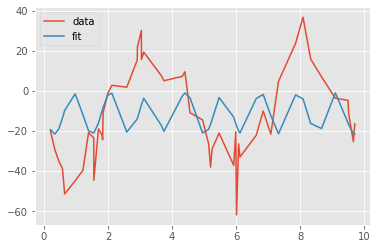

In [271]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

## create data : y = 30cos(1.3x+2) - 8
np.random.seed(42)
xs = np.sort(np.random.uniform(0, 10, size=50))
ys = np.cos(1.3*xs + 2) * 30 - 8
noise = np.random.randn(len(xs)) * 10
ys = ys + noise

## cos function for fitting
def func_cos(x, a, b, c, phi):
    return a * np.cos(b * x + phi) + c

## fit
popt, pcov = curve_fit(func_cos, xs, ys, bounds=((-50,0,-50,0),(100,10,100,6)))
ys_fit = func_cos(xs, *popt)
print("a b c phi :", *popt)

plt.plot(xs, ys, label="data")
plt.plot(xs, ys_fit, label="fit")
plt.legend()

In [108]:
14.55 - np.pi*4

1.9836293856408282

In [222]:
df_sentaku = pd.DataFrame({"col1":[10,8,15,3,8], "col2":[3,9,2,6,9], "製品名":["A","A","A","B","B"]})
df_sentaku

,col1,col2,製品名
0,10,3,A
1,8,9,A
2,15,2,A
3,3,6,B
4,8,9,B


In [223]:
df_low = pd.DataFrame({"製品名":["A","B"],"col1":[3,5],"col2":[3,5]})
df_low = df_low.set_index("製品名")
df_low

,col1,col2
製品名,,
A,3,3
B,5,5


In [224]:
def over_3sigma(row): # input = one row in dataframe 
    product_name = row["製品名"]
    row = row.drop("製品名") # pd.Series with [col1, col2]
    lower_limits = df_low.loc[product_name] # pd.Series with [col1, col2]
    return all(row > lower_limits) # OR: any(), AND: all()

In [225]:
df_sentaku[df_sentaku.apply(over_3sigma, axis=1)]

,col1,col2,製品名
1,8,9,A
4,8,9,B


In [228]:
def search_simple(data, value):
    size = len(data)
    for i in range(size):
        if data[i] == value:
            return i
    return -1

data = [3,1,6,4,8,10]

place1 = search_simple(data, 4)
place2 = search_simple(data, 5)

print( f"4のある場所は {place1}" )
print( f"5のある場所は {place2}" )

4のある場所は 3
5のある場所は -1


In [230]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

x, y = np.meshgrid(np.linspace(-4, 4, 400), np.linspace(-4, 4, 400))
z = x + y*1j

In [236]:
s = 'りんご みかん ぶどう'
s.split(" ", 1)[1]

'みかん ぶどう'

In [250]:
import numpy as np

xs = np.linspace(0,1,1001)
ys = 4 / (1 + xs**2)

area = 0
for i in range(len(xs)-1):
    dx = xs[i+1] - xs[i]
    area += dx * (ys[i+1]+ys[i]) / 2

print("台形公式:", area)
print("誤差:", np.pi-area)

台形公式: 3.141592486923129
誤差: 1.6666666402542774e-07


In [252]:
xs = np.linspace(0,1,1001)
ys = 4 / (1 + xs**2)

area = 0
for i in range(0, len(xs)-2, 2):
    h = xs[i+1] - xs[i]
    area += h * (ys[i] + 4*ys[i+1] + ys[i+2]) / 3

print("シンプソン公式:", area)
print("誤差:", np.pi-area)

シンプソン公式: 3.141592653589792
誤差: 1.3322676295501878e-15


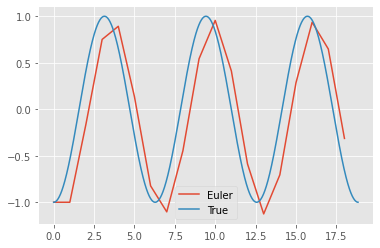

In [277]:
# x' = dx/dt = sint
# x = -cost
# x_n+1 = x_n + dt*sin(t_n)

dt = 1
ts = np.arange(0, 6*np.pi, dt)

xs = [-1]
for i in range(len(ts)-1):
    x_next = xs[-1] + dt * np.sin(ts[i])
    xs.append(x_next)

plt.plot(ts, xs, label="Euler")

ts_true = np.arange(0, 6*np.pi, 1e-2)
xs_true = -np.cos(ts_true)
plt.plot(ts_true, xs_true, label="True")

plt.legend()

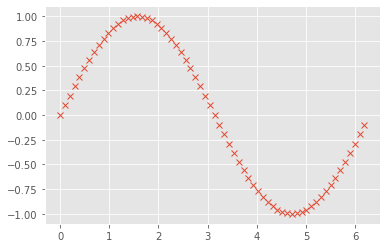

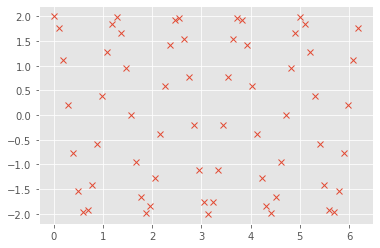

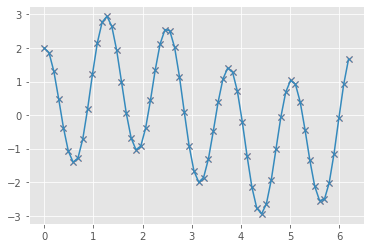

(64, 64) (64,)


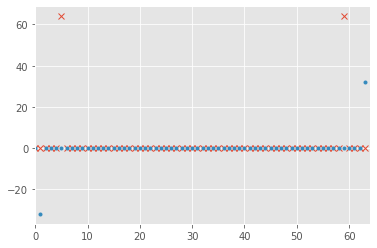

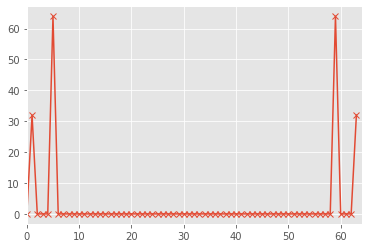

In [308]:
import matplotlib.pyplot as plt
import random

import numpy as np



plt.xlim(0,N)
plt.plot(p_spect , marker="x")
plt.show()



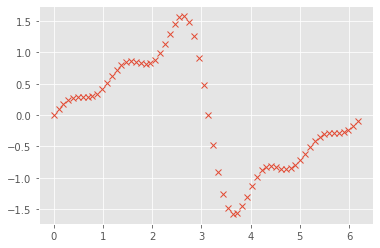

In [309]:
N=64
s = 2 * np.pi/N 
x = np.arange(0, 2 * np.pi, s)
y = np.sin(x)
for n in range(2, 6):
    y += (-1)**(n-1) * np.sin(n*x) / n
plt.plot(x, y, marker="x", linestyle='None')
plt.show()

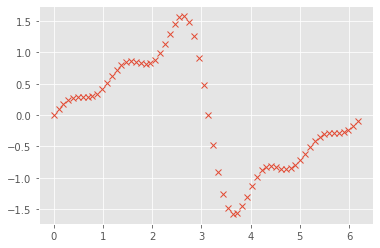

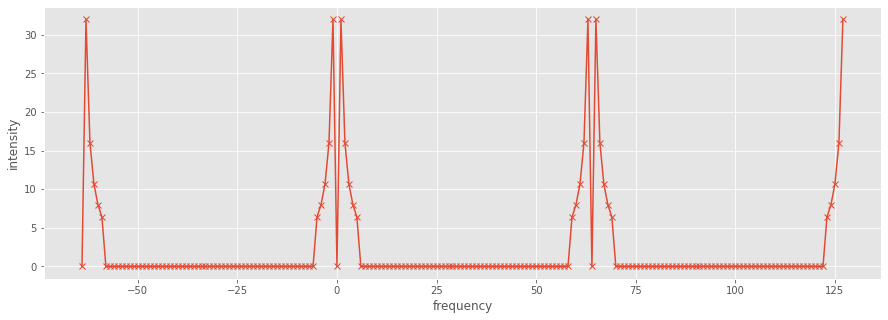

In [330]:
N=64
s = 2 * np.pi/N 
x = np.arange(0, 2 * np.pi, s)
y = np.sin(x)
for n in range(2, 6):
    y += (-1)**(n-1) * np.sin(n*x) / n
plt.plot(x, y, marker="x", linestyle='None')
plt.show()

W = np.empty((N, N), dtype=complex)
r, c = W.shape
for i in range(r):
    for k in range(c):
        W[i,k] = complex(np.cos(-2*np.pi*i*k/N), np.sin(-2*np.pi*i*k/N))

X = np.dot(W, y)
p_spect=abs(X)

plt.figure(figsize=(15,5))
plt.plot(np.arange(-64, 128), list(p_spect) + list(p_spect) + list(p_spect)  , marker="x")
plt.xlabel("frequency"); plt.ylabel("intensity")
plt.show()

In [373]:
from bs4 import BeautifulSoup
import requests, re

url = "https://www.youtube.com/@CardshopPonpoko"
response = requests.get(url)

subscriber = re.search(r'label":"([\d\.KM]+) subscribers' , response.text).group(1)
subscriber

'6.68K'

/var/folders/52/l2wyvfk15dz9_4btyv7zzl2r0000gn/T/ipykernel_32329/1547512978.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


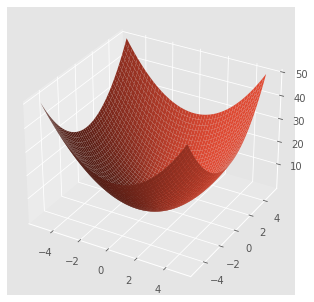

In [383]:
x, y = np.meshgrid(np.linspace(-5,5,500), np.linspace(-5,5,500))
z = x + y*1j
w = z**2
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x,y,np.abs(w))
plt.show()

In [381]:
x

array([[-5.        , -4.97995992, -4.95991984, ...,  4.95991984,
         4.97995992,  5.        ],
       [-5.        , -4.97995992, -4.95991984, ...,  4.95991984,
         4.97995992,  5.        ],
       [-5.        , -4.97995992, -4.95991984, ...,  4.95991984,
         4.97995992,  5.        ],
       ...,
       [-5.        , -4.97995992, -4.95991984, ...,  4.95991984,
         4.97995992,  5.        ],
       [-5.        , -4.97995992, -4.95991984, ...,  4.95991984,
         4.97995992,  5.        ],
       [-5.        , -4.97995992, -4.95991984, ...,  4.95991984,
         4.97995992,  5.        ]])

In [379]:
from mpl_toolkits.mplot3d import Axes3D